In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df=pd.read_csv("Churn_Modelling (1).csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()/len(df)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

# UNIVARIATE ANALYSIS.

In [8]:
cat_col=df.select_dtypes(include="O")
cat_col.columns

Index(['Geography', 'Gender'], dtype='object')

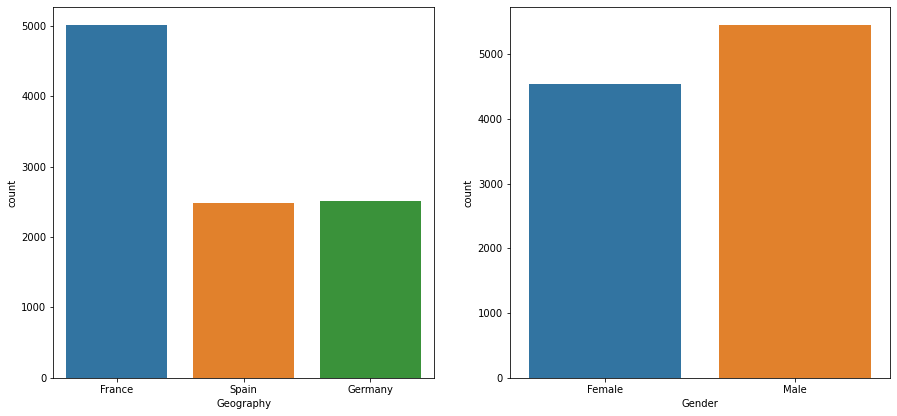

In [9]:
plt.figure(figsize=(15,15))
count=1
for i in cat_col:
    plt.subplot(2,2,count)
    sns.countplot(df[i])
    count+=1
plt.show()

In [10]:
num_col=df.select_dtypes(include=["int","float"])
num_col.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

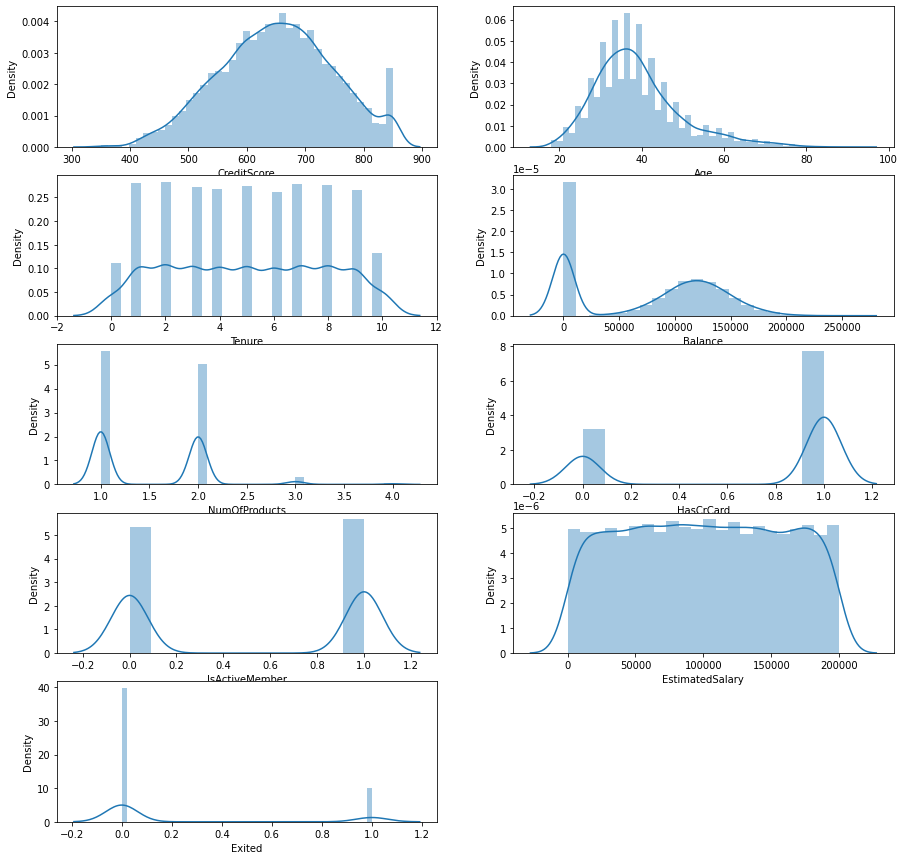

In [11]:
plt.figure(figsize=(15,15))
count=1
for i in num_col:
    plt.subplot(5,2,count)
    sns.distplot(df[i])
    count+=1
plt.show()

# BIVARIATE ANALYSIS.

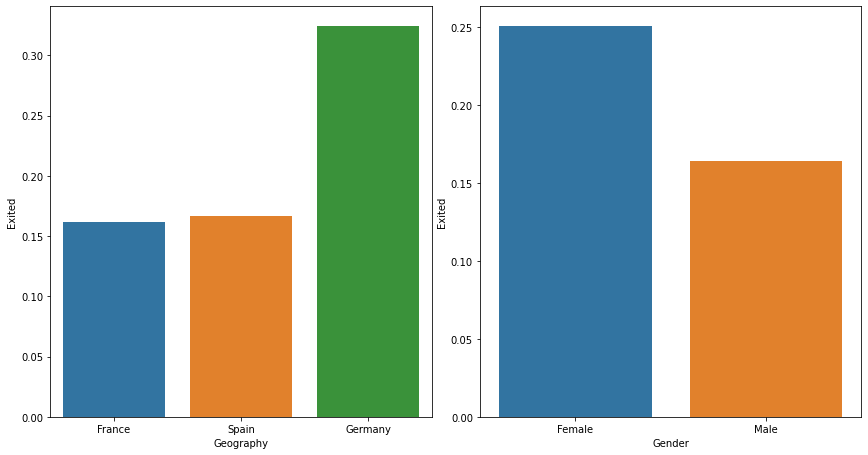

In [12]:
plt.figure(figsize=(12,12))
count=1
for i in cat_col:
    plt.subplot(2,2,count)
    sns.barplot(x=i,y="Exited",data=df,ci=False)
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df["Geography"]=le.fit_transform(df["Geography"])

In [16]:
df["Gender"]=le.fit_transform(df["Gender"])

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=25)

In [21]:
X_test.shape

(2000, 10)

In [22]:
X_train.shape

(8000, 10)

<AxesSubplot:>

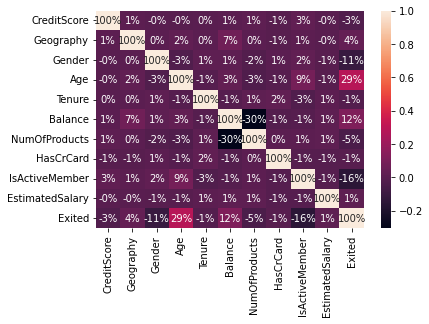

In [23]:
sns.heatmap(df.corr(),annot=True,fmt=".0%")

# FEATURE SCALING.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# MODEL BUILDING.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
reg=LogisticRegression()

In [29]:
reg.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6353
           1       0.61      0.19      0.28      1647

    accuracy                           0.81      8000
   macro avg       0.71      0.58      0.59      8000
weighted avg       0.78      0.81      0.76      8000

Test Data
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1610
           1       0.52      0.19      0.28       390

    accuracy                           0.81      2000
   macro avg       0.68      0.57      0.58      2000
weighted avg       0.77      0.81      0.77      2000



In [33]:
print("Train Data")
print(confusion_matrix(y_train,y_pred_train))
print("Test Data")
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[6154  199]
 [1342  305]]
Test Data
[[1543   67]
 [ 317   73]]


In [34]:
y_train_proba=reg.predict_proba(X_train)
y_train_proba

array([[0.75518565, 0.24481435],
       [0.57554256, 0.42445744],
       [0.95863836, 0.04136164],
       ...,
       [0.96440954, 0.03559046],
       [0.91076347, 0.08923653],
       [0.55325907, 0.44674093]])

In [35]:
y_train_proba=reg.predict_proba(X_train)[:,1]
y_train_proba

array([0.24481435, 0.42445744, 0.04136164, ..., 0.03559046, 0.08923653,
       0.44674093])

In [36]:
y_test_proba=reg.predict_proba(X_test)[:,1]
y_test_proba 

array([0.17799114, 0.11887449, 0.0945712 , ..., 0.75639372, 0.17049201,
       0.11292339])

# PR CURVE.

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

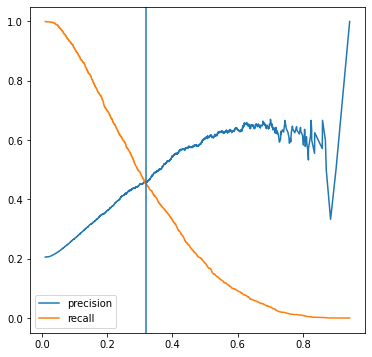

In [39]:
plt.figure(figsize=(6,6))
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label="recall")
plt.axvline(0.32)
plt.show()

In [40]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score
def metrics(y_actual,y_train_proba,th):
    y_pred_temp=[1 if p>th else 0 for p in y_train_proba]
    accuracy=accuracy_score(y_actual,y_pred_temp)
    recall=recall_score(y_actual,y_pred_temp)
    precision=precision_score(y_actual,y_pred_temp)
    f1=f1_score(y_actual,y_pred_temp)
    roc_auc=roc_auc_score(y_actual,y_pred_temp)
    return {"Accuracy":accuracy,"Recall":recall,"Precision":precision,"F1":f1,"ROC_AUC":roc_auc}

In [41]:
print("Train Data")
print(metrics(y_train,y_train_proba,0.32))
print("Test Data")
print(metrics(y_test,y_test_proba,0.32))


Train Data
{'Accuracy': 0.7775, 'Recall': 0.4517304189435337, 'Precision': 0.458975940777298, 'F1': 0.45532435740514077, 'ROC_AUC': 0.6568427004209246}
Test Data
{'Accuracy': 0.7875, 'Recall': 0.4717948717948718, 'Precision': 0.456575682382134, 'F1': 0.4640605296343001, 'ROC_AUC': 0.6678850135371874}


In [42]:
from sklearn.metrics import roc_curve

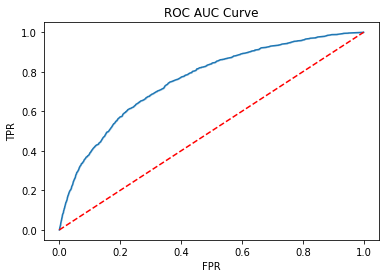

In [43]:
fpr,tpr,th=roc_curve(y_train,y_train_proba)
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],color="red",linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.show()

# KNN ALGORITHM.

# MODEL BUILDING.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix

In [46]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      6353
           1       0.80      0.52      0.63      1647

    accuracy                           0.87      8000
   macro avg       0.84      0.74      0.78      8000
weighted avg       0.87      0.87      0.86      8000

Test Data
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1610
           1       0.66      0.38      0.48       390

    accuracy                           0.84      2000
   macro avg       0.76      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000



In [47]:
param_grid={"n_neighbors":np.arange(1,15),"weights":["uniform","distance"],"metric":["minkowski","manhattan","euclidean"]}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_clf=GridSearchCV(clf,param_grid=param_grid,scoring="f1",cv=5,n_jobs=-1)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [50]:
grid_clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}

In [51]:
grid_clf.best_score_

0.4943240401770431

In [52]:
grid_train_pred=grid_clf.predict(X_train)
grid_test_pred=grid_clf.predict(X_test)

In [53]:
print("Train data")
print(classification_report(y_train,grid_train_pred))
print(classification_report(y_test,grid_test_pred))

Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6353
           1       1.00      1.00      1.00      1647

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1610
           1       0.63      0.43      0.51       390

    accuracy                           0.84      2000
   macro avg       0.75      0.68      0.71      2000
weighted avg       0.82      0.84      0.83      2000



In [54]:
clf=KNeighborsClassifier(metric='minkowski',n_neighbors=4,weights='uniform')
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      6353
           1       0.89      0.42      0.57      1647

    accuracy                           0.87      8000
   macro avg       0.88      0.70      0.75      8000
weighted avg       0.87      0.87      0.85      8000

Test Data
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1610
           1       0.71      0.28      0.40       390

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



# DECISION TREE

In [55]:
X1=df.iloc[:,:-1]
y1=df.iloc[:,-1]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=25)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt=DecisionTreeClassifier()

In [60]:
dt.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [61]:
y_train_pred2=dt.predict(X1_train)
y_test_pred2=dt.predict(X1_test)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print("Train Data")
print(classification_report(y_train,y_train_pred2))
print("Test Data")
print(classification_report(y_test,y_test_pred2))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6353
           1       1.00      1.00      1.00      1647

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test Data
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1610
           1       0.47      0.49      0.48       390

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.80      0.79      0.79      2000



# HYPER PARAMETER TUNING.

In [64]:
param_grid={
    
     "criterion":["gini","entropy"],
     "max_depth":np.arange(1,50),
     "min_samples_leaf":np.arange(1,30),
     "min_samples_split":np.arange(2,20,1),
     "class_weight":[None ,"balanced"]
}

In [65]:
from sklearn.model_selection import RandomizedSearchCV
random_dt=RandomizedSearchCV(dt,param_distributions=param_grid,cv=5,scoring="f1",n_jobs=-1)
random_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   scoring='f1')

In [67]:
random_dt.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 14,
 'max_depth': 36,
 'criterion': 'gini',
 'class_weight': None}

In [68]:
random_dt.best_estimator_

DecisionTreeClassifier(max_depth=36, min_samples_leaf=14, min_samples_split=5)

In [69]:
random_dt.best_score_

0.5598967036163589

In [70]:
grid_train_pred2=random_dt.predict(X_train)
grid_test_pred2=random_dt.predict(X_test)

In [71]:
print("Train Data")
print(classification_report(y_train,grid_train_pred2))
print("Test Data")
print(classification_report(y_test,grid_test_pred2))

Train Data
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6353
           1       0.77      0.59      0.67      1647

    accuracy                           0.88      8000
   macro avg       0.84      0.77      0.80      8000
weighted avg       0.87      0.88      0.87      8000

Test Data
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1610
           1       0.64      0.49      0.55       390

    accuracy                           0.85      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000

